In [42]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [43]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split


In [44]:
def get_data():
    data = load_svmlight_file("./housing_scale.txt")
    return data[0], data[1]

def Linear_regression(X_train, X_validation, y_train, y_validation, learning_rate,max_iteration):
    Loss_train = []
    Loss_validation = []
    b_train = 0.0
    W_train = np.zeros((1,X_train.shape[1]))
    b_validation = 0.0
    W_validation = np.zeros((1,X_validation.shape[1]))
    
    for i in range(max_iteration):
        Loss_train.append(np.sum((y_train - (X_train * np.transpose(W_train) + b_train)) ** 2) / X_train.shape[0])
        Loss_validation.append(np.sum((y_validation - (X_validation * np.transpose(W_validation) 
                                                       + b_validation)) ** 2) / X_validation.shape[0])
        
        #update        
        #D_b = - np.sum((y_train - (X_train * np.transpose(W) + b)))
        #D_W = - np.transpose(y_train - (X_train * np.transpose(W) + b)) * X_train
        #b = b - learning_rate * D_b
        #W = W - learning_rate * D_W       
        D_b_train = np.sum(- 2 * (y_train - X_train * np.transpose(W_train) - b_train) / X_train.shape[0])
        D_W_train = - 2 * np.transpose(y_train - X_train * np.transpose(W_train) - b_train) * X_train / X_train.shape[0]
        b_train = b_train - (learning_rate * D_b_train)
        W_train = W_train - (learning_rate * D_W_train)
        
        D_b_validation = np.sum(- 2 * (y_validation - X_validation * np.transpose(W_validation) - b_validation) / X_validation.shape[0])
        D_W_validation = - 2 * np.transpose(y_validation - X_validation* np.transpose(W_validation)
                                            - b_validation) * X_validation / X_validation.shape[0]
        b_validation = b_validation - (learning_rate * D_b_validation)
        W_validation= W_validation - (learning_rate * D_W_validation)

    print('Iteration num = %d'%(max_iteration))
    ax = plt.subplot()
    line_train = ax.plot(range(max_iteration), Loss_train, label='Train')
    line_validate = ax.plot(range(max_iteration), Loss_validation, label='Validation')
    ax.set(xlabel='Iterations', ylabel='Loss')
    plt.legend()
    plt.show()
    return 

In [45]:
#1.load data file
X, y = get_data()
y = y.reshape((len(y), 1))
#2.split data set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3, random_state = 1)

Iteration num = 10


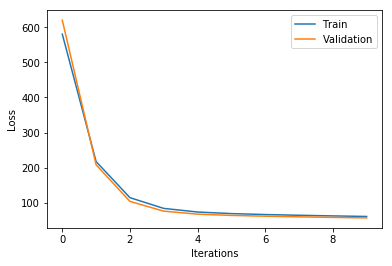

Iteration num = 50


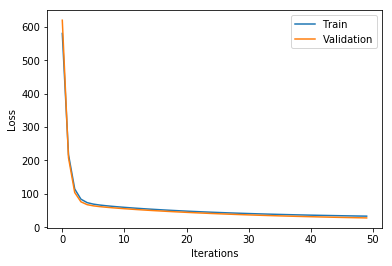

Iteration num = 100


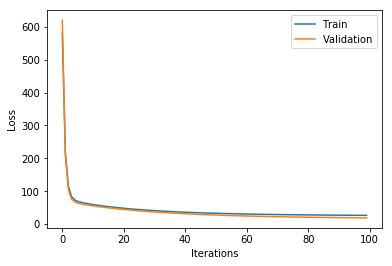

Iteration num = 150


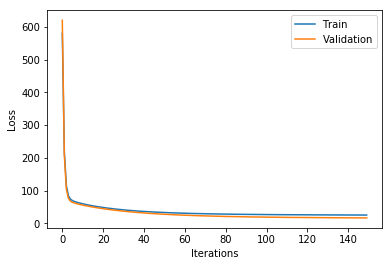

Iteration num = 250


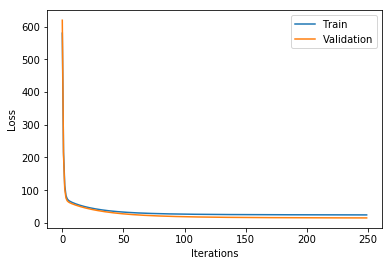

Iteration num = 500


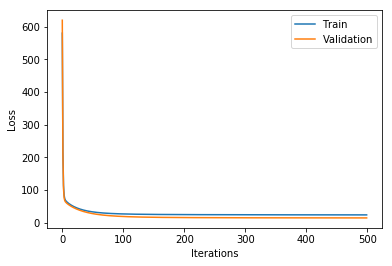

In [47]:
max_iteration = [10, 50, 100, 150, 250, 500]

learning_rate = 0.05
for i in range(len(max_iteration)):
    Linear_regression(X_train, X_validation, y_train, y_validation, learning_rate,max_iteration[i])

